**Importing `Libraries` and Loading `Dataset`**

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import learning_curve

# Suppressing warnings
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset
df = pd.read_csv('dataset.csv')

# Displaying the first five rows of the dataset
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


__Exploratory Data Analysis (EDA)__

In [2]:
# Viewing the size of our dataframe
row, col = df.shape
print(f"Our dataframe has {row} rows and {col} columns.")

Our dataframe has 4920 rows and 134 columns.


In [3]:
# Checking for data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [4]:
df.isna().sum().sum()

4920

In [5]:
# Checking for duplicates
df.duplicated().sum()

4616

In [6]:
# Droping the duplicates
df = df.drop_duplicates()

In [7]:
# Dropping the 'Unnamed: 133' column since all its entries are NaN values
df = df.drop(columns=['Unnamed: 133'])

In [8]:
# Checking descriptive statistics
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,...,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,0.134868,0.138158,0.013158,0.039474,0.013158,0.174342,0.151316,0.036184,0.049342,0.019737,...,0.013158,0.013158,0.013158,0.019737,0.019737,0.019737,0.019737,0.016447,0.016447,0.016447
std,0.342146,0.345635,0.114139,0.195040,0.114139,0.380029,0.358947,0.187056,0.216938,0.139324,...,0.114139,0.114139,0.114139,0.139324,0.139324,0.139324,0.139324,0.127398,0.127398,0.127398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Checking the unique number of classes in the 'prognosis' column
df['prognosis'].nunique()

41

In [10]:
# Checking the class balance of the target variable
df['prognosis'].value_counts(normalize=True)

Hepatitis D                                0.032895
Dengue                                     0.032895
Chicken pox                                0.032895
Migraine                                   0.032895
Hepatitis B                                0.029605
Hypoglycemia                               0.029605
Common Cold                                0.029605
Tuberculosis                               0.029605
Hepatitis E                                0.029605
hepatitis A                                0.029605
Typhoid                                    0.029605
Hyperthyroidism                            0.029605
Jaundice                                   0.029605
Diabetes                                   0.029605
Pneumonia                                  0.029605
Varicose veins                             0.026316
Malaria                                    0.026316
Hypothyroidism                             0.026316
Alcoholic hepatitis                        0.026316
Chronic chol

In [11]:
# Encoding the 'prognosis' column using LabelEncoder
label_encoder = LabelEncoder()
df['prognosis_encoded'] = label_encoder.fit_transform(df['prognosis'])

**Creating our feature and target variable**

In [12]:
# Splitting data into features and target
X = df.drop(['prognosis', 'prognosis_encoded'], axis=1)
y = df['prognosis_encoded']

# Splitting data into training and testing sets while preserving class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

# Checking the size of our test and train 
a,b = X_train.shape
c,d = X_test.shape
e = y_train.shape
f = y_test.shape

print('='*40)
print(f"X-Train have {a} rows, and {b} columns.")

print('='*40)
print(f"X-Test have {c} rows, and {c} columns.")

print('='*40)
print(f"X-Train have {e} rows.")

print('='*40)
print(f"X-Test have {f} rows.")

print('='*40)
print(f"Y test has {y_test.nunique()} unique classes")
print('='*40)
print(f"Y train has {y_train.nunique()} unique classes")

X-Train have 243 rows, and 132 columns.
X-Test have 61 rows, and 61 columns.
X-Train have (243,) rows.
X-Test have (61,) rows.
Y test has 41 unique classes
Y train has 41 unique classes


**Functions for Training and Evaluating Models**

In [13]:
# Function to train and test a machine learning model with cross-validation
def train_test_model(model, X_train, y_train, X_test, y_test, cv=5):
    """
    Train and test a machine learning model with cross-validation.

    Parameters:
    model: The machine learning model to be trained and tested.
    X_train: Training data features.
    y_train: Training data labels.
    X_test: Testing data features.
    y_test: Testing data labels.
    cv: Number of folds for cross-validation (default=5).

    Returns:
    trained_model: The trained machine learning model.
    metrics_dict: Dictionary containing cross-validated accuracy, precision, recall, F1-score, and support.
    """
    # Model training
    model.fit(X_train, y_train)

    # Cross-validation for evaluation
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    cv_scores_rounded = [round(score, 2) for score in cv_scores]
    # Calculate mean of cross-validation scores
    cv_mean_score = round(cv_scores.mean(), 2)

    # Accuracy score
    accuracy = accuracy_score(y_test, model.predict(X_test))
    print("Accuracy Score:", round(accuracy, 2))

    # Other metrics - Precision, Recall, F1-score, Support
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, model.predict(X_test), average='weighted')

    # Format metrics to 2 decimal places
    precision = round(precision, 2)
    recall = round(recall, 2)
    f1_score = round(f1_score, 2)
    
    # Create a dictionary containing various metrics
    metrics_dict = {
        'cross_val': cv_scores_rounded,  # Already a list
        'cross_val_accuracy': cv_mean_score,
        'accuracy': round(accuracy, 2),
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score
    }

    # Printing the metrics on separate lines
    for key, value in metrics_dict.items():
        print(f"{key}: {value}")

    return model, metrics_dict


**Function to plot our training VS test Accuracy**

In [14]:
def plot_learning_curve(estimator, X, y, cv, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy',
        shuffle=True, random_state=42, return_times=False)

    train_sizes_abs = np.linspace(0, 1, train_sizes.shape[0])

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes_abs, train_scores_mean, 'o-', label='Training Accuracy')
    plt.plot(train_sizes_abs, test_scores_mean, 'o-', label='Test Accuracy')

    plt.xlabel('Training examples')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve: Training vs Test Accuracy')
    plt.legend()
    plt.grid()
    plt.show()


**Naive Bayes Model and Evaluation**

In [15]:
# Initializing Multinomial Naive Bayes model
naive_bayes_model = MultinomialNB()

# Training and evaluating the Naive Bayes model
print("Evaluation Metrics for Naive Bayes:")
print('=' * 70)
print()
trained_nb_model, nb_metrics = train_test_model(naive_bayes_model, X_train, y_train, X_test, y_test)

Evaluation Metrics for Naive Bayes:

Accuracy Score: 0.98
cross_val: [0.98, 0.94, 0.98, 0.98, 0.98]
cross_val_accuracy: 0.97
accuracy: 0.98
precision: 0.97
recall: 0.98
f1_score: 0.98


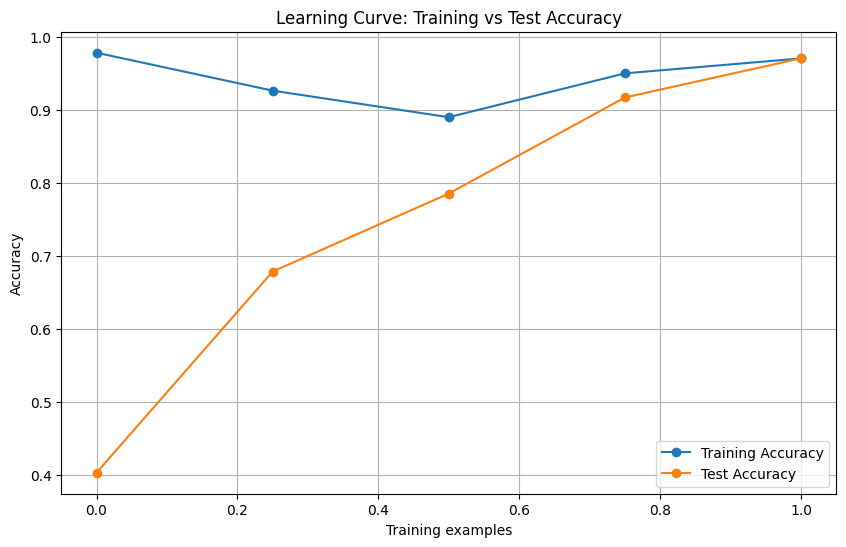

In [16]:
plot_learning_curve(naive_bayes_model, X_train, y_train, cv=5)

**Hyperparameter Tuning of the Navie Bayes Model**

In [17]:
# Fine-tuning the hyperparameters for the Naive Bayes model
alpha_values = {'alpha': np.linspace(0.3, 3, 30)}
naive_bayes_model = MultinomialNB()
grid_search = GridSearchCV(naive_bayes_model, alpha_values, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

print("Best Alpha:", best_alpha)
print("Best Accuracy Score:", best_score)

Best Alpha: 0.3
Best Accuracy Score: 0.9876700680272108


**Training the model with best Hyperparameters**

In [18]:
best_naive_bayes_model = MultinomialNB(alpha=best_alpha)

# Training and evaluating the tuned Naive Bayes model
print("Evaluation Metrics for Tuned Naive Bayes:")
print('=' * 70)
print()
trained_best_nb_model, best_nb_metrics = train_test_model(best_naive_bayes_model, X_train, y_train, X_test, y_test)

Evaluation Metrics for Tuned Naive Bayes:

Accuracy Score: 0.98
cross_val: [1.0, 0.98, 0.98, 1.0, 0.98]
cross_val_accuracy: 0.99
accuracy: 0.98
precision: 0.97
recall: 0.98
f1_score: 0.98


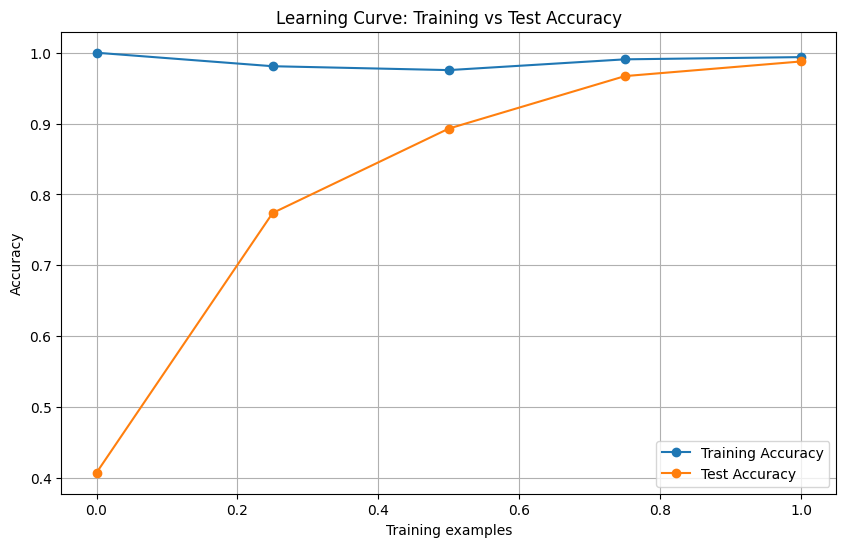

In [19]:
plot_learning_curve(best_naive_bayes_model, X_train, y_train, cv=5)

**Decision Tree Classifier Model and Evaluation**

In [20]:
# Creating the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Training and evaluating the Decision Tree classifier
print("Evaluation Metrics for Decision Tree Classifier:")
print('=' * 70)
print()
trained_dt_model, dt_metrics = train_test_model(dt_model, X_train, y_train, X_test, y_test)

Evaluation Metrics for Decision Tree Classifier:

Accuracy Score: 0.61
cross_val: [0.76, 0.73, 0.67, 0.65, 0.65]
cross_val_accuracy: 0.69
accuracy: 0.61
precision: 0.61
recall: 0.61
f1_score: 0.58


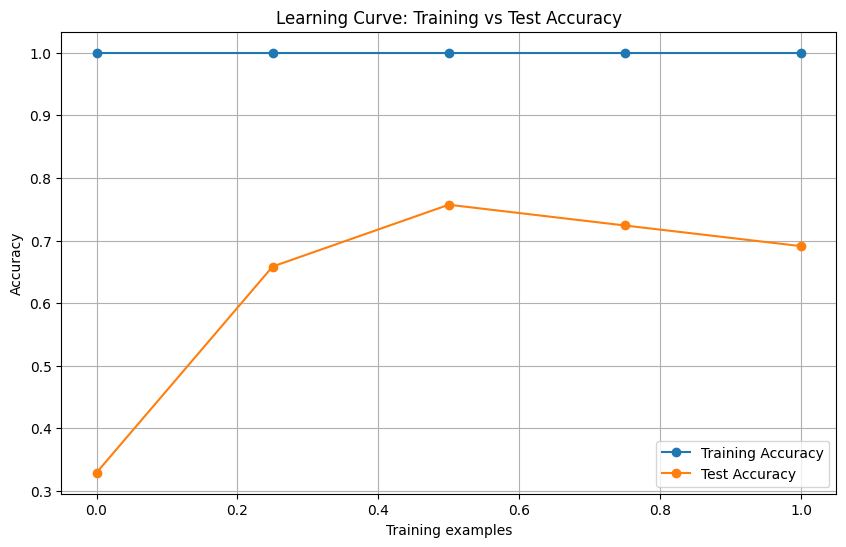

In [21]:
plot_learning_curve(dt_model, X_train, y_train, cv=5)

**Hyperparameter Tuning of the Decision Tree Model**

In [22]:
# Hyperparameter tuning for Decision Tree classifier
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

dt_model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_dt_model = DecisionTreeClassifier(**best_params, random_state=42)

# Training and evaluating the tuned Decision Tree classifier
print("Evaluation Metrics for Tuned Decision Tree Classifier:")
print('=' * 70)
print()
trained_best_dt_model, best_dt_metrics = train_test_model(best_dt_model, X_train, y_train, X_test, y_test)

Evaluation Metrics for Tuned Decision Tree Classifier:

Accuracy Score: 0.85
cross_val: [0.92, 0.78, 0.67, 0.83, 0.77]
cross_val_accuracy: 0.79
accuracy: 0.85
precision: 0.81
recall: 0.85
f1_score: 0.82


**Training the model with best Hyperparameters**

In [23]:
best_dt_model = DecisionTreeClassifier(**best_params, random_state=42)

# Training and evaluating the tuned Decision Tree classifier
print("Evaluation Metrics for Tuned Decision Tree Classifier:")
print('=' * 70)
print()
trained_best_dt_model, best_dt_metrics = train_test_model(best_dt_model, X_train, y_train, X_test, y_test)

Evaluation Metrics for Tuned Decision Tree Classifier:

Accuracy Score: 0.85
cross_val: [0.92, 0.78, 0.67, 0.83, 0.77]
cross_val_accuracy: 0.79
accuracy: 0.85
precision: 0.81
recall: 0.85
f1_score: 0.82


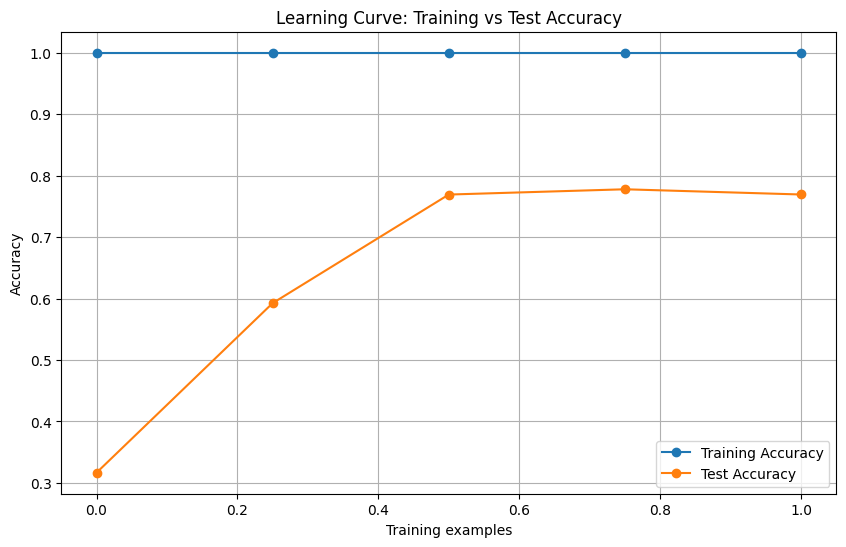

In [24]:
plot_learning_curve(best_dt_model, X_train, y_train, cv=5)

**Random Forest Classifier Model and Evaluation**

In [25]:
# Creating the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)

# Training and evaluating the Random Forest Classifier
print("Evaluation Metrics for Random Forest Classifier:")
print('=' * 70)
print()
trained_rf_model, rf_metrics = train_test_model(rf_model, X_train, y_train, X_test, y_test)

Evaluation Metrics for Random Forest Classifier:

Accuracy Score: 0.97
cross_val: [0.98, 0.96, 1.0, 1.0, 0.98]
cross_val_accuracy: 0.98
accuracy: 0.97
precision: 0.95
recall: 0.97
f1_score: 0.96


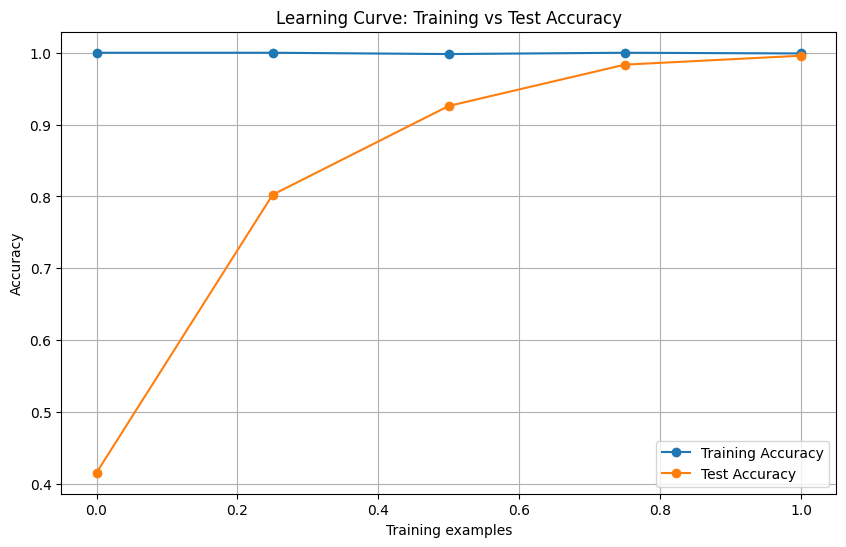

In [26]:
plot_learning_curve(rf_model, X_train, y_train, cv=5)

**Ridge Classifie and Evaluation**

In [27]:
ridge = RidgeClassifier()

# Training and evaluating the Ridge Classifier
print("Evaluation Metrics for Ridge Classifier:")
print('=' * 70)
print()
trained_ridge_model, ridge_metrics  = train_test_model(ridge, X_train, y_train, X_test, y_test)

Evaluation Metrics for Ridge Classifier:

Accuracy Score: 1.0
cross_val: [1.0, 0.98, 1.0, 1.0, 0.98]
cross_val_accuracy: 0.99
accuracy: 1.0
precision: 1.0
recall: 1.0
f1_score: 1.0


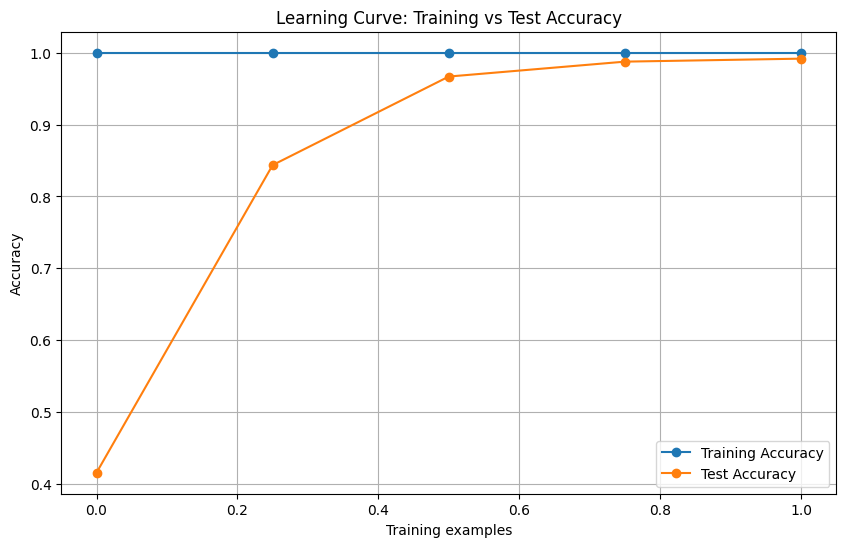

In [28]:
plot_learning_curve(ridge, X_train, y_train, cv=5)

**Hyperparameter Tuning of the Ridge Model**

In [29]:
# L2 Regularization with Ridge Classifier
ridge_tune = RidgeClassifier(alpha=0.1)  # Alpha is the regularization strength

# Training and evaluating the Ridge Classifier
print("Evaluation Metrics for Ridge Classifier:")
print('=' * 70)
print()
trained_ridge_tune_model, ridge_tune_metrics = train_test_model(ridge_tune, X_train, y_train, X_test, y_test)

Evaluation Metrics for Ridge Classifier:

Accuracy Score: 0.89
cross_val: [0.98, 0.92, 0.98, 0.96, 0.94]
cross_val_accuracy: 0.95
accuracy: 0.89
precision: 0.84
recall: 0.89
f1_score: 0.85


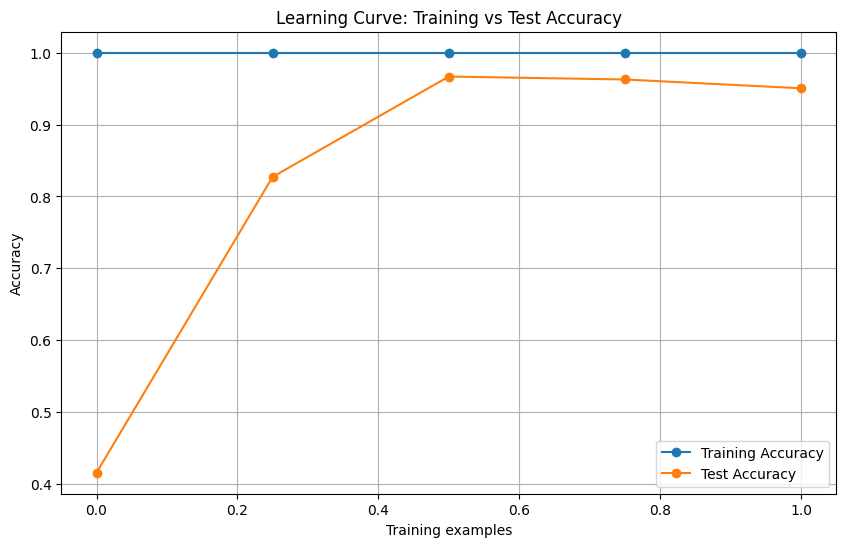

In [30]:
plot_learning_curve(ridge_tune, X_train, y_train, cv=5)

In [31]:
lr_model = LogisticRegression()

# Training and evaluating the KNN classifier
print("Evaluation Metrics for Logistic Regression Classifier:")
print('=' * 70)
print()
trained_lr_model, lr_metrics = train_test_model(lr_model, X_train, y_train, X_test, y_test)

Evaluation Metrics for Logistic Regression Classifier:

Accuracy Score: 1.0
cross_val: [1.0, 1.0, 1.0, 1.0, 1.0]
cross_val_accuracy: 1.0
accuracy: 1.0
precision: 1.0
recall: 1.0
f1_score: 1.0


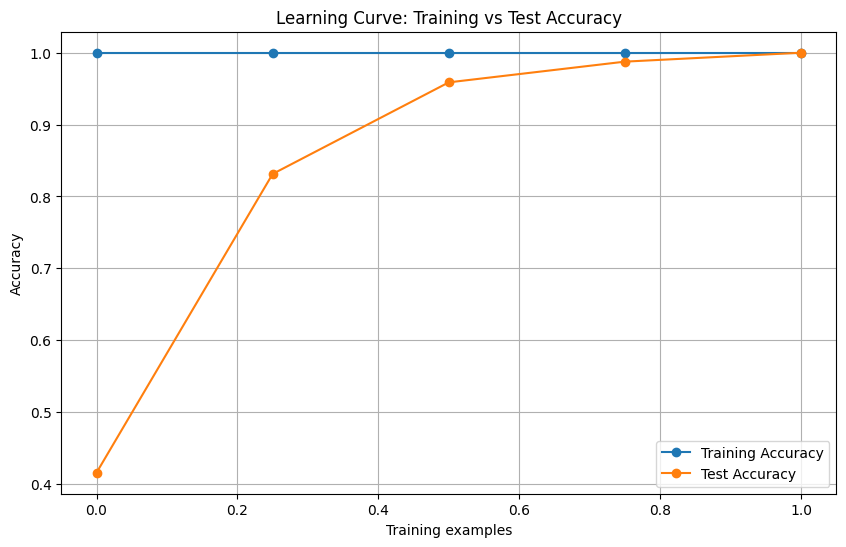

In [32]:
plot_learning_curve(lr_model, X_train, y_train, cv=5)

**Handling Overfitting in Our Logistic Regression Model**

There is all indications that the logistic regression model is overfitting, let's handle it using L1 regularization techique

In [33]:
# L1 Regularization with Logistic Regression
logistic_l1 = LogisticRegression(penalty='l1', solver='liblinear')

# Training and evaluating the KNN classifier
print("Evaluation Metrics for Logistic Regression(Tuned) Classifier:")
print('=' * 70)
print()
trained_logistic_l1_model, logistic_l1_metrics = train_test_model(logistic_l1, X_train, y_train, X_test, y_test)

Evaluation Metrics for Logistic Regression(Tuned) Classifier:

Accuracy Score: 0.84
cross_val: [0.94, 0.82, 0.9, 0.92, 0.79]
cross_val_accuracy: 0.87
accuracy: 0.84
precision: 0.78
recall: 0.84
f1_score: 0.79


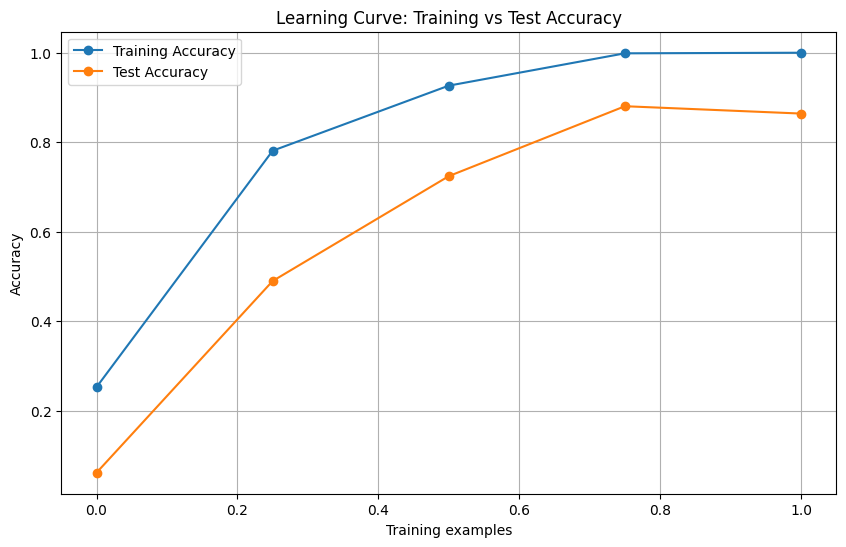

In [34]:
plot_learning_curve(logistic_l1, X_train, y_train, cv=5)

In [39]:
# Combine all metrics dictionaries into a single list
all_metrics_list = [
    logistic_l1_metrics,
    lr_metrics,
    ridge_tune_metrics,
    ridge_metrics,
    rf_metrics,
    best_dt_metrics,
    dt_metrics,
    best_nb_metrics,
    nb_metrics
]

# Create a DataFrame from the list of dictionaries
all_metrics_df = pd.DataFrame(all_metrics_list)

# Transpose the DataFrame for better visibility (optional)
all_metrics_df

,cross_val,cross_val_accuracy,accuracy,precision,recall,f1_score
0,"[0.94, 0.82, 0.9, 0.92, 0.79]",0.87,0.84,0.78,0.84,0.79
1,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.00,1.00,1.00,1.00,1.00
2,"[0.98, 0.92, 0.98, 0.96, 0.94]",0.95,0.89,0.84,0.89,0.85
3,"[1.0, 0.98, 1.0, 1.0, 0.98]",0.99,1.00,1.00,1.00,1.00
4,"[0.98, 0.96, 1.0, 1.0, 0.98]",0.98,0.97,0.95,0.97,0.96
5,"[0.92, 0.78, 0.67, 0.83, 0.77]",0.79,0.85,0.81,0.85,0.82
6,"[0.76, 0.73, 0.67, 0.65, 0.65]",0.69,0.61,0.61,0.61,0.58
7,"[1.0, 0.98, 0.98, 1.0, 0.98]",0.99,0.98,0.97,0.98,0.98
8,"[0.98, 0.94, 0.98, 0.98, 0.98]",0.97,0.98,0.97,0.98,0.98


In [41]:
model_names = [
    'Tuned Logistic Regression',
    'Logistic Regression',
    'Tuned Ridge',
    'Ridge',
    'Random Forest',
    'Tuned Decision Tree',
    'Decision Tree',
    'Tuned Naive Bayes',
    'Naive Bayes'
]

# Replace the index with model names
all_metrics_df.index = model_names

In [42]:
all_metrics_df

,cross_val,cross_val_accuracy,accuracy,precision,recall,f1_score
Tuned Logistic Regression,"[0.94, 0.82, 0.9, 0.92, 0.79]",0.87,0.84,0.78,0.84,0.79
Logistic Regression,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.00,1.00,1.00,1.00,1.00
Tuned Ridge,"[0.98, 0.92, 0.98, 0.96, 0.94]",0.95,0.89,0.84,0.89,0.85
Ridge,"[1.0, 0.98, 1.0, 1.0, 0.98]",0.99,1.00,1.00,1.00,1.00
Random Forest,"[0.98, 0.96, 1.0, 1.0, 0.98]",0.98,0.97,0.95,0.97,0.96
Tuned Decision Tree,"[0.92, 0.78, 0.67, 0.83, 0.77]",0.79,0.85,0.81,0.85,0.82
Decision Tree,"[0.76, 0.73, 0.67, 0.65, 0.65]",0.69,0.61,0.61,0.61,0.58
Tuned Naive Bayes,"[1.0, 0.98, 0.98, 1.0, 0.98]",0.99,0.98,0.97,0.98,0.98
Naive Bayes,"[0.98, 0.94, 0.98, 0.98, 0.98]",0.97,0.98,0.97,0.98,0.98
